# Analyse des tables de données disponibles

Pour une analyse plus détaillée voir aussi le notebook suivant:  
https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/data

In [1]:
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt

# Schéma des tables du jeu de données

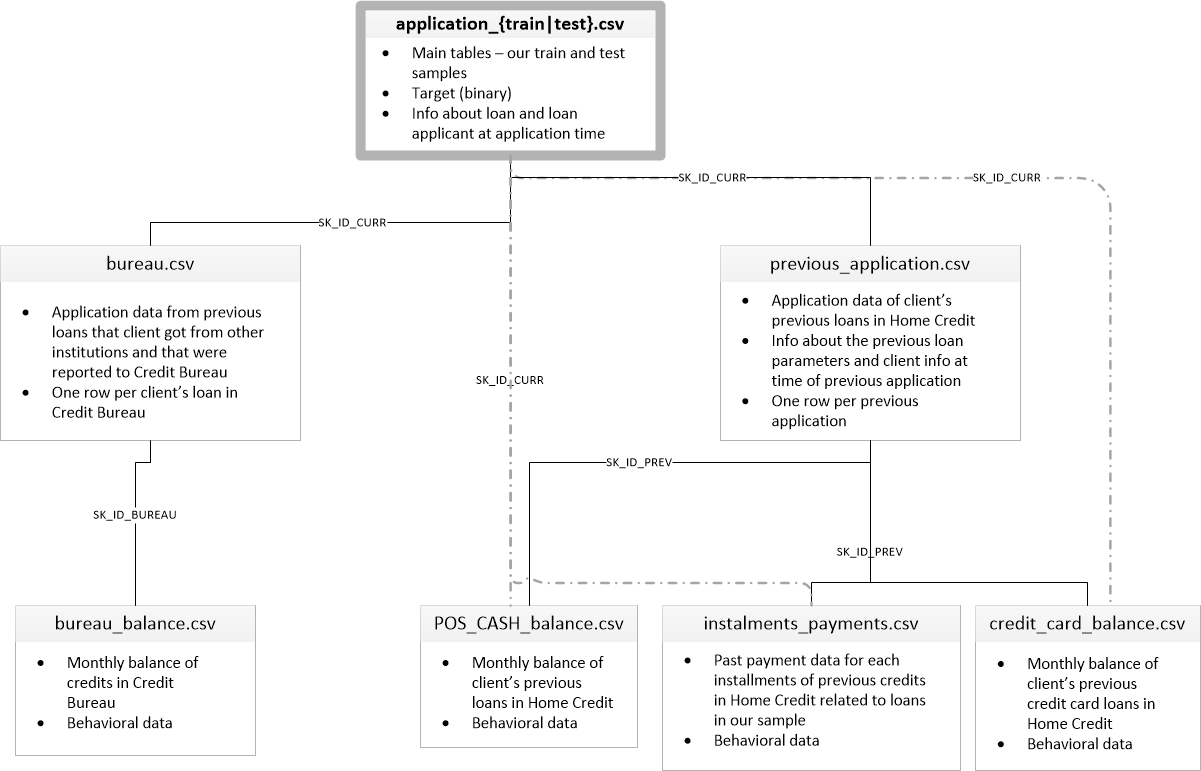

In [3]:
Image(filename='../data/home_credit.png')

# Tables principales: application_train & application_test

application_test et application_train sont les 2 tables principales. La table d'entrainement a une colonne 'target' qui n'est pas dans la table de test.

## Table application_train

In [4]:
# Chargement du jeu d'entraînement
application_train = pd.read_csv('../data/application_train.csv')
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Nombre de clients avec la target 0 (crédit accordé)
target_0_nb = (application_train.TARGET==0).sum()
target_0_nb

282686

In [6]:
# Nombre de clients avec la target 1 (crédit refusé)
target_1_nb = (application_train.TARGET==1).sum()
target_1_nb

24825

On voit que les classes sont déséquilibrées. Il y a une majorité de crédits qui sont accordés.

Text(0.5, 1.0, "Répartition des décisions d'octroi de crédits dans le train set")

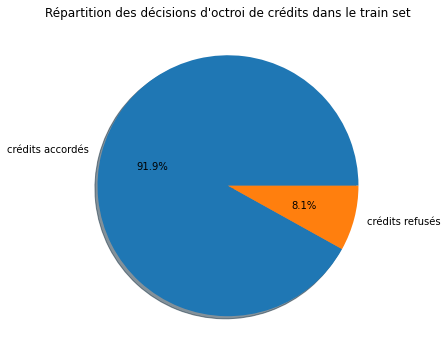

In [7]:
# Graphique de répartition des classes
plt.figure(figsize=(6, 6))
targets_nb = [target_0_nb, target_1_nb]
plt.pie(targets_nb, shadow=True, autopct='%1.1f%%',
        labels=['crédits accordés', "crédits refusés"])
plt.title("Répartition des décisions d'octroi de crédits dans le train set")

Chaque ligne correspond à un prêt. L'identifiant du prêt (SK_ID_CURR) est unique.

In [8]:
application_train.SK_ID_CURR.nunique()

307511

In [9]:
# Les features sont en colonne
application_train.shape

(307511, 122)

## Table application _test

In [10]:
# Chargement du jeu de test
application_test = pd.read_csv('../data/application_test.csv')
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# dimensions du test set
application_test.shape

(48744, 121)

Identification des colonnes du train set qui ne sont pas dans le test set

In [12]:
# Colonnes dans application_train non présentes dans application_test
set(application_train.columns)-(set(application_test.columns))

{'TARGET'}

Identification des colonnes du test set qui ne sont pas dans le train set

In [13]:
# Colonnes dans application_test non présentes dans application_train
set(application_test.columns)-(set(application_train.columns))

set()

Les 2 tables ont bien les mêmes colonnes à l'exception de la colonne TARGET qui est spécifique à application_train.

In [14]:
# Nombre de valeurs unique pour la colonne SK_ID_CURR
application_test.SK_ID_CURR.nunique()

48744

In [15]:
# Nombre de lignes dans la table
len(application_test)

48744

La colonne SK_ID_CURR correspond à un identifiant crédit unique.

#### Correspondance des classes après conversion (utile pour la suite du projet)

In [16]:
application_test['CODE_GENDER'].unique()

array(['F', 'M'], dtype=object)

In [17]:
pd.factorize(application_test['CODE_GENDER'])

(array([0, 1, 1, ..., 0, 1, 0]), Index(['F', 'M'], dtype='object'))

conversion F -> 0; M ->1

In [18]:
application_test['FLAG_OWN_CAR'].unique()

array(['N', 'Y'], dtype=object)

In [19]:
pd.factorize(application_test['FLAG_OWN_CAR'])

(array([0, 0, 1, ..., 1, 0, 1]), Index(['N', 'Y'], dtype='object'))

conversion 'FLAG_OWN_CAR': N -> 0; Y ->1

In [20]:
application_test['DAYS_EMPLOYED'].describe()

count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

# Table bureau

Crédits contractés par les clients dans les autres institutions financières tels que reportés au Credit Bureau. Chaque ligne correspond à un crédit. Un même client peut donc correspondre à plusieurs lignes.

Chaque crédit a un identifiant unique SK_ID_BUREAU. A un crédit (SK_ID_CURR) peut correspondre plusieurs crédits passés (SK_ID_BUREAU)

In [21]:
bureau = pd.read_csv('../data/bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [22]:
# Exemple d'un client ayant plusieurs crédits dans d'autres établissements.
bureau[bureau.SK_ID_CURR==100002]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
675684,100002,6158904,Closed,currency 1,-1125,0,-1038.0,-1038.0,NaN,0,40761.000,NaN,NaN,0.0,Credit card,-1038,0.0
675685,100002,6158905,Closed,currency 1,-476,0,NaN,-48.0,NaN,0,0.000,0.0,NaN,0.0,Credit card,-47,NaN
675686,100002,6158906,Closed,currency 1,-1437,0,-1072.0,-1185.0,0.000,0,135000.000,0.0,0.000,0.0,Consumer credit,-1185,0.0
675687,100002,6158907,Closed,currency 1,-1121,0,-911.0,-911.0,3321.000,0,19071.000,NaN,NaN,0.0,Consumer credit,-906,0.0
675688,100002,6158908,Closed,currency 1,-645,0,85.0,-36.0,5043.645,0,120735.000,0.0,0.000,0.0,Consumer credit,-34,0.0
675689,100002,6158909,Active,currency 1,-103,0,NaN,NaN,40.500,0,31988.565,0.0,31988.565,0.0,Credit card,-24,0.0
1337779,100002,6158903,Active,currency 1,-1042,0,780.0,NaN,NaN,0,450000.000,245781.0,0.000,0.0,Consumer credit,-7,0.0
1486113,100002,6113835,Closed,currency 1,-1043,0,62.0,-967.0,0.000,0,67500.000,NaN,NaN,0.0,Credit card,-758,0.0


In [23]:
bureau.SK_ID_BUREAU.nunique()

1716428

In [24]:
bureau.shape

(1716428, 17)

In [25]:
bureau.CREDIT_CURRENCY.unique()

array(['currency 1', 'currency 2', 'currency 4', 'currency 3'],
      dtype=object)

In [26]:
bureau.CREDIT_ACTIVE.unique()

array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object)

In [27]:
bureau.CREDIT_TYPE.unique()

array(['Consumer credit', 'Credit card', 'Mortgage', 'Car loan',
       'Microloan', 'Loan for working capital replenishment',
       'Loan for business development', 'Real estate loan',
       'Unknown type of loan', 'Another type of loan',
       'Cash loan (non-earmarked)', 'Loan for the purchase of equipment',
       'Mobile operator loan', 'Interbank credit',
       'Loan for purchase of shares (margin lending)'], dtype=object)

SK_ID_BUREAU = identifiant unique pour chaque crédit de l'échantillon

# Table bureau_balance

Données mensuelles sur les précédents crédits. Chaque ligne correspond à un mois de crédit. Un crédit a autant de lignes qu'il y a de mois de remboursement.

In [28]:
bureau_balance = pd.read_csv('../data/bureau_balance.csv')
bureau_balance

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [29]:
# signification des codes
bureau_balance.STATUS.unique()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

C = closed, X = unknown, 0 = no DPD, etc...

In [30]:
bureau_balance.shape

(27299925, 3)

# Table Credit Card Balance

Relevé mensuel des anciennes cartes de crédit des clients avec le Home crédit. Une même carte de crédit peut avoir plusieurs lignes.

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.  
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

In [31]:
credit_card_balance = pd.read_csv('../data/credit_card_balance.csv')
credit_card_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [32]:
# nombre de prêts actuels
credit_card_balance.SK_ID_CURR.nunique()

103558

In [33]:
# ID des anciens prêts
credit_card_balance.SK_ID_PREV.nunique()

104307

In [34]:
# Exemple d'un crédit actuel
credit_card_balance[credit_card_balance.SK_ID_CURR==378907].sort_values(by=['MONTHS_BALANCE'])

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1811769,2562384,378907,-48,69186.690,270000,67500.0,67500.000,0.0,0.000,NaN,...,67841.190,67841.190,1.0,1,0.0,0.0,NaN,Active,0,0
2584127,2562384,378907,-47,62727.075,270000,0.0,0.000,0.0,0.000,3498.975,...,63246.825,63246.825,0.0,0,0.0,0.0,1.0,Active,0,0
3284876,2562384,378907,-46,62577.900,270000,0.0,0.000,0.0,0.000,3399.795,...,63082.080,63082.080,0.0,0,0.0,0.0,2.0,Active,0,0
2653597,2562384,378907,-45,61484.400,270000,0.0,0.000,0.0,0.000,3346.695,...,61980.255,61980.255,0.0,0,0.0,0.0,3.0,Active,0,0
1039133,2562384,378907,-44,60736.680,270000,0.0,0.000,0.0,0.000,3291.390,...,61224.345,61224.345,0.0,0,0.0,0.0,4.0,Active,0,0
2021610,2562384,378907,-43,59786.865,270000,0.0,0.000,0.0,0.000,3242.250,...,60267.735,60267.735,0.0,0,0.0,0.0,5.0,Active,0,0
1764744,2562384,378907,-42,58743.675,270000,0.0,0.000,0.0,0.000,3194.190,...,59216.985,59216.985,0.0,0,0.0,0.0,6.0,Active,0,0
2239489,2562384,378907,-41,57725.595,270000,0.0,0.000,0.0,0.000,3141.450,...,58191.525,58191.525,0.0,0,0.0,0.0,7.0,Active,0,0
2648695,2562384,378907,-40,51462.360,270000,0.0,0.000,0.0,0.000,3089.925,...,51920.145,51920.145,0.0,0,0.0,0.0,8.0,Active,0,0
561468,2562384,378907,-39,56570.940,270000,0.0,0.000,0.0,0.000,2761.740,...,56570.940,56570.940,0.0,0,0.0,0.0,9.0,Active,6,6


# Table HomeCredit_columns_description

Description des colonnes

Le format de la table HomeCredit_columns_description est invalide. Il faut trouver le bon format d'encodage.

https://stackoverflow.com/questions/54133455/importing-csv-using-pd-read-csv-invalid-start-byte-error

In [37]:
# Recherche du format d'encodage
import chardet    
rawdata = open('../data/HomeCredit_columns_description.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

Windows-1252


Table décrivant les colonnes dans les divers fichiers

In [38]:
HomeCredit_columns_description = pd.read_csv('../data/HomeCredit_columns_description.csv',
                                             encoding = 'Windows-1252',
                                            index_col=0)
HomeCredit_columns_description

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...
217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [39]:
HomeCredit_columns_description.sort_values(by=['Row'])

,Table,Row,Description,Special
179,previous_application.csv,AMT_ANNUITY,Annuity of previous application,NaN
141,bureau.csv,AMT_ANNUITY,Annuity of the Credit Bureau credit,NaN
12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN
180,previous_application.csv,AMT_APPLICATION,For how much credit did client ask on the prev...,NaN
156,credit_card_balance.csv,AMT_BALANCE,Balance during the month of previous credit,NaN
...,...,...,...,...
77,application_{train|test}.csv,YEARS_BEGINEXPLUATATION_MEDI,Normalized information about building where th...,normalized
63,application_{train|test}.csv,YEARS_BEGINEXPLUATATION_MODE,Normalized information about building where th...,normalized
50,application_{train|test}.csv,YEARS_BUILD_AVG,Normalized information about building where th...,normalized
78,application_{train|test}.csv,YEARS_BUILD_MEDI,Normalized information about building where th...,normalized


In [40]:
# Recherche des identifiants / clés
HomeCredit_columns_description[
    HomeCredit_columns_description.Row.str.contains('ID')]

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
23,application_{train|test}.csv,DAYS_ID_PUBLISH,How many days before the application did clien...,time only relative to the application
125,bureau.csv,SK_ID_CURR,ID of loan in our sample - one loan in our sam...,hashed
126,bureau.csv,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit re...,hashed
142,bureau_balance.csv,SK_BUREAU_ID,Recoded ID of Credit Bureau credit (unique cod...,hashed
145,POS_CASH_balance.csv,SK_ID_PREV,ID of previous credit in Home Credit related t...,NaN
146,POS_CASH_balance.csv,SK_ID_CURR,ID of loan in our sample,NaN
153,credit_card_balance.csv,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
154,credit_card_balance.csv,SK_ID_CURR,ID of loan in our sample,hashed
176,previous_application.csv,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed


In [41]:
# On peut faire une recherche à partir d'un mot clé
HomeCredit_columns_description[
    HomeCredit_columns_description.Row.str.contains('DOWN')].loc[:,['Row','Description']]

,Row,Description
182,AMT_DOWN_PAYMENT,Down payment on the previous application
189,RATE_DOWN_PAYMENT,Down payment rate normalized on previous credit


In [42]:
# Features importantes retenues dans la phase 2 du projet
important_features = ['EXT_SOURCE_3','EXT_SOURCE_2', 'PREV_DAYS_DECISION_MIN', 'CODE_GENDER','DAYS_EMPLOYED', 
                     'PREV_APP_CREDIT_PERC_MIN', 'INSTAL_DPD_MAX','AMT_CREDIT', 'DAYS_BIRTH',
                     'FLAG_OWN_CAR', 'NAME_EDUCATION_TYPE_Higher_education', 'NAME_INCOME_TYPE_State_servant']

In [43]:
HomeCredit_columns_description[
    HomeCredit_columns_description.Row.str.contains('EXT_SOURCE')].loc[:,['Row','Description']]

,Row,Description
44,EXT_SOURCE_1,Normalized score from external data source
45,EXT_SOURCE_2,Normalized score from external data source
46,EXT_SOURCE_3,Normalized score from external data source


In [44]:
HomeCredit_columns_description[
    HomeCredit_columns_description.Row.str.contains('DAYS_DECISION')].loc[:,['Row','Description']]

,Row,Description
194,DAYS_DECISION,Relative to current application when was the d...


In [54]:
HomeCredit_columns_description[
    HomeCredit_columns_description.Row.str.contains('AMT_APPLICATION')].loc[:,['Row','Description']]

,Row,Description
180,AMT_APPLICATION,For how much credit did client ask on the prev...


In [53]:
HomeCredit_columns_description[
    HomeCredit_columns_description.Row.str.contains('CREDIT')]['Description']

11                             Credit amount of the loan
119    Number of enquiries to Credit Bureau about the...
120    Number of enquiries to Credit Bureau about the...
121    Number of enquiries to Credit Bureau about the...
122    Number of enquiries to Credit Bureau about the...
123    Number of enquiries to Credit Bureau about the...
124    Number of enquiries to Credit Bureau about the...
127    Status of the Credit Bureau (CB) reported credits
128         Recoded currency of the Credit Bureau credit
129    How many days before current application did c...
130    Number of days past due on CB credit at the ti...
131    Remaining duration of CB credit (in days) at t...
133    Maximal amount overdue on the Credit Bureau cr...
134    How many times was the Credit Bureau credit pr...
135    Current credit amount for the Credit Bureau cr...
136                 Current debt on Credit Bureau credit
137    Current credit limit of credit card reported i...
138       Current amount overdu

In [46]:
HomeCredit_columns_description[
    HomeCredit_columns_description.Row.str.contains('DPD')].loc[:,['Row','Description']]

,Row,Description
151,SK_DPD,DPD (days past due) during the month of previo...
152,SK_DPD_DEF,DPD during the month with tolerance (debts wit...
174,SK_DPD,DPD (Days past due) during the month on the pr...
175,SK_DPD_DEF,DPD (Days past due) during the month with tole...


In [47]:
HomeCredit_columns_description[
    HomeCredit_columns_description.Row.str.contains('AMT_CRED')].loc[:,['Row','Description']]

,Row,Description
11,AMT_CREDIT,Credit amount of the loan
133,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau cr...
135,AMT_CREDIT_SUM,Current credit amount for the Credit Bureau cr...
136,AMT_CREDIT_SUM_DEBT,Current debt on Credit Bureau credit
137,AMT_CREDIT_SUM_LIMIT,Current credit limit of credit card reported i...
138,AMT_CREDIT_SUM_OVERDUE,Current amount overdue on Credit Bureau credit
157,AMT_CREDIT_LIMIT_ACTUAL,Credit card limit during the month of the prev...
181,AMT_CREDIT,Final credit amount on the previous applicatio...


# Table installments_payments

Historique des remboursements de crédit immobiliers pour les prêts de l'échantillon. Il y a une ligne pour chaque paiement effectué et pour chaque paiement manqué. 

Chaque ligne correspond au paiement d'une mensualité ou chaque mensualité correspond au règlement d'un crédit immobilier de l'échantillon.

In [48]:
installments_payments = pd.read_csv('../data/installments_payments.csv')
installments_payments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


# Table POS_CASH_balance

Données mensuelles sur les précédents prêt à la consommation des clients Home Credit. Chaque ligne correspond à un mois. Un même prêt peut avoir plusieurs lignes. 

In [49]:
POS_CASH_balance = pd.read_csv('../data/POS_CASH_balance.csv')
POS_CASH_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


# Table previous_application

Précédentes demandes de prêts au Home Credit. A chaque prêt actuel peut correspondre plusieurs demandes anciennes.

In [51]:
previous_application = pd.read_csv('../data/previous_application.csv')
previous_application

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


On peut remarquer qu'il y a plusieurs types de crédits

In [52]:
previous_application.NAME_CONTRACT_TYPE.unique()

array(['Consumer loans', 'Cash loans', 'Revolving loans', 'XNA'],
      dtype=object)